In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Importing dataset

In [ ]:
dataset= pd.read_excel('/content/201904 sales reciepts.xlsx')
dataset

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,16:51:58,8,42,0,N,1,1,30,1,3.00,3.00,N
49890,756,2019-04-29,16:51:14,8,42,8412,Y,1,1,25,2,4.40,2.20,N
49891,759,2019-04-29,11:17:36,8,15,0,Y,1,1,31,1,2.20,2.20,N
49892,763,2019-04-29,15:45:52,8,45,8030,N,1,1,44,2,5.00,2.50,N


Removing Unnecessary Columns

In [ ]:
dataset.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'sales_outlet_id', 'staff_id', 'customer_id', 'instore_yn', 'order',
       'line_item_id', 'product_id', 'quantity', 'line_item_amount',
       'unit_price', 'promo_item_yn'],
      dtype='object')

In [ ]:
subset= dataset[['transaction_id', 'transaction_date',
       'sales_outlet_id', 'customer_id', 'order',
       'line_item_id', 'product_id', 'quantity',
       'unit_price']]
subset

,transaction_id,transaction_date,sales_outlet_id,customer_id,order,line_item_id,product_id,quantity,unit_price
0,7,2019-04-01,3,558,1,1,52,1,2.50
1,11,2019-04-01,3,781,1,1,27,2,3.50
2,19,2019-04-01,3,788,1,1,46,2,2.50
3,32,2019-04-01,3,683,1,1,23,2,2.50
4,33,2019-04-01,3,99,1,1,34,1,2.45
...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,8,0,1,1,30,1,3.00
49890,756,2019-04-29,8,8412,1,1,25,2,2.20
49891,759,2019-04-29,8,0,1,1,31,1,2.20
49892,763,2019-04-29,8,8030,1,1,44,2,2.50


Checking null values

In [ ]:
subset.isnull().sum()

transaction_id      0
transaction_date    0
sales_outlet_id     0
customer_id         0
order               0
line_item_id        0
product_id          0
quantity            0
unit_price          0
dtype: int64

In [ ]:
subset.nunique()

transaction_id      4203
transaction_date      29
sales_outlet_id        3
customer_id         2248
order                  9
line_item_id          11
product_id            80
quantity               6
unit_price            41
dtype: int64

Checking for outliers in Unit Price

{'whiskers': [<matplotlib.lines.Line2D at 0x7f960ac31610>,
 'caps': [<matplotlib.lines.Line2D at 0x7f960ac31b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f960ac31370>],
 'medians': [<matplotlib.lines.Line2D at 0x7f960ac3c0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f960ac3c370>],
 'means': []}

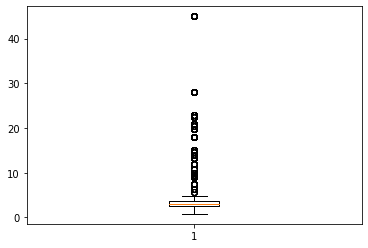

In [ ]:
plt.boxplot(subset.unit_price)

In [ ]:
upperlimit= subset['unit_price'].mean() + 3*subset['unit_price'].std()
lowerlimit= subset['unit_price'].mean() - 3*subset['unit_price'].std()
print(upperlimit)
print(lowerlimit)

11.432279584576154
-4.662988687875149


In [ ]:
new_subset= subset.loc[(subset['unit_price']< upperlimit)|(subset['unit_price']> lowerlimit)]
new_subset

,transaction_id,transaction_date,sales_outlet_id,customer_id,order,line_item_id,product_id,quantity,unit_price
0,7,2019-04-01,3,558,1,1,52,1,2.50
1,11,2019-04-01,3,781,1,1,27,2,3.50
2,19,2019-04-01,3,788,1,1,46,2,2.50
3,32,2019-04-01,3,683,1,1,23,2,2.50
4,33,2019-04-01,3,99,1,1,34,1,2.45
...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,8,0,1,1,30,1,3.00
49890,756,2019-04-29,8,8412,1,1,25,2,2.20
49891,759,2019-04-29,8,0,1,1,31,1,2.20
49892,763,2019-04-29,8,8030,1,1,44,2,2.50


Relationship Analysis

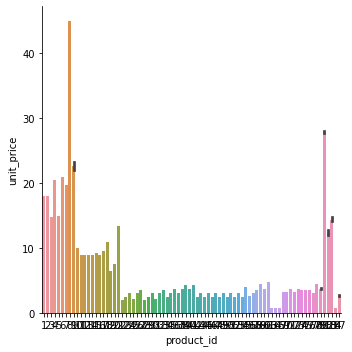

In [ ]:
sns.catplot(x='product_id', y='unit_price', data= new_subset, kind= 'bar')

In [ ]:
subset.to_excel('/content/new_sales.xlsx')